# Stock Market Prediction using Numerical and Textual Analysis


###  ● Objective:
Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

● Stock to analyze and predict - SENSEX (S&P BSE SENSEX) or  any other of your choice

● Download historical stock prices from www.finance.yahoo.com (I have used Infosys Stock "INFY" here.)

● Download textual (news) data from https://bit.ly/36fFPI6

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

### Reading Dataset

In [2]:
df=pd.read_csv('infy_stocks.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,2.878906,2.914063,2.710938,2.730469,1.931548,4483200
1,2001-01-03,2.705078,3.406250,2.691406,3.234375,2.288014,5856000
2,2001-01-04,3.193359,3.238281,3.031250,3.093750,2.188534,3811200
3,2001-01-05,3.148438,3.171875,2.937500,2.960938,2.094583,7414400
4,2001-01-08,2.953125,2.957031,2.767578,2.901855,2.052787,4326400


In [3]:
df1=df.copy()
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,2.878906,2.914063,2.710938,2.730469,1.931548,4483200
1,2001-01-03,2.705078,3.406250,2.691406,3.234375,2.288014,5856000
2,2001-01-04,3.193359,3.238281,3.031250,3.093750,2.188534,3811200
3,2001-01-05,3.148438,3.171875,2.937500,2.960938,2.094583,7414400
4,2001-01-08,2.953125,2.957031,2.767578,2.901855,2.052787,4326400


In [4]:
news_title=pd.read_csv('india-news-headlines.csv')
news_title.head(10)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
5,20010102,unknown,Dilute the power of transfers; says Riberio
6,20010102,unknown,Focus shifts to teaching of Hindi
7,20010102,unknown,IT will become compulsory in schools
8,20010102,unknown,Move to stop freedom fighters' pension flayed
9,20010102,unknown,Gilani claims he applied for passport 2 years ago


In [5]:
news_title.shape

(3424067, 3)

In [6]:
df1.shape

(5094, 7)

### FEAUTRE ENGINEERING

In [7]:
len(df1),len(news_title)

(5094, 3424067)

In [8]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5.094000e+03
mean,6.423301,6.491481,6.354288,6.424466,5.433062,1.225933e+07
std,3.131143,3.145358,3.115879,3.132031,3.200801,9.389762e+06
min,1.015938,1.070938,0.956250,1.031875,0.730778,3.360000e+05
25%,4.374531,4.425312,4.313125,4.370312,3.207041,6.629950e+06
50%,6.536875,6.597500,6.476250,6.549375,5.097252,1.004820e+07
75%,8.220000,8.299062,8.150000,8.220000,7.002832,1.525480e+07
max,19.219999,19.370001,19.160000,19.330000,19.330000,1.475912e+08


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5094 non-null   object 
 1   Open       5094 non-null   float64
 2   High       5094 non-null   float64
 3   Low        5094 non-null   float64
 4   Close      5094 non-null   float64
 5   Adj Close  5094 non-null   float64
 6   Volume     5094 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 278.7+ KB


In [10]:
df1.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5089,False,False,False,False,False,False,False
5090,False,False,False,False,False,False,False
5091,False,False,False,False,False,False,False
5092,False,False,False,False,False,False,False


In [11]:
df1.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [12]:
news_title.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

## STOCK PRICE DATA

In [13]:
df1 = df1.drop_duplicates()

In [14]:
df1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [15]:
# converting datatype of column 'Date' from object type to 'datetime' datatype.
df1['Date']=pd.to_datetime(df1['Date']).dt.normalize()

In [16]:
df1.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [17]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,2.878906,2.914063,2.710938,2.730469,1.931548,4483200
1,2001-01-03,2.705078,3.406250,2.691406,3.234375,2.288014,5856000
2,2001-01-04,3.193359,3.238281,3.031250,3.093750,2.188534,3811200
3,2001-01-05,3.148438,3.171875,2.937500,2.960938,2.094583,7414400
4,2001-01-08,2.953125,2.957031,2.767578,2.901855,2.052787,4326400


In [18]:
# filtering the important columns required
df1=df1.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])

In [19]:
df1.set_index('Date',inplace=True)
df1.head()

,Close,Open,High,Low,Volume
Date,,,,,
2001-01-02,2.730469,2.878906,2.914063,2.710938,4483200
2001-01-03,3.234375,2.705078,3.406250,2.691406,5856000
2001-01-04,3.093750,3.193359,3.238281,3.031250,3811200
2001-01-05,2.960938,3.148438,3.171875,2.937500,7414400
2001-01-08,2.901855,2.953125,2.957031,2.767578,4326400


In [20]:
df1.sort_index(ascending=True,axis=0)

,Close,Open,High,Low,Volume
Date,,,,,
2001-01-02,2.730469,2.878906,2.914063,2.710938,4483200
2001-01-03,3.234375,2.705078,3.406250,2.691406,5856000
2001-01-04,3.093750,3.193359,3.238281,3.031250,3811200
2001-01-05,2.960938,3.148438,3.171875,2.937500,7414400
2001-01-08,2.901855,2.953125,2.957031,2.767578,4326400
...,...,...,...,...,...
2021-03-26,18.719999,18.530001,18.719999,18.299999,13425300
2021-03-29,18.430000,18.700001,18.740000,18.360001,8066300
2021-03-30,18.799999,18.790001,18.910000,18.750000,7845100


### Plotting to get insights from stocks data

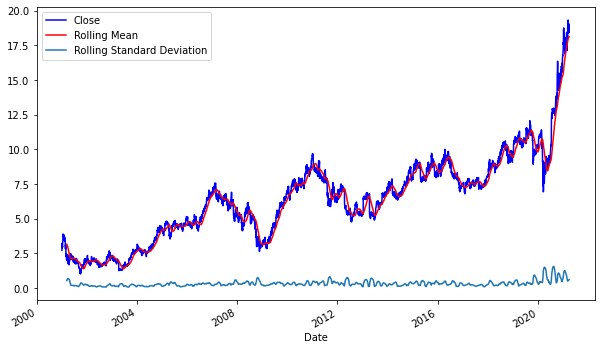

In [21]:
#Plotting moving average
import matplotlib.pyplot as plt
close = df1['Close']
mean = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df1['Close'].plot(color = 'b', label = 'Close')
mean.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

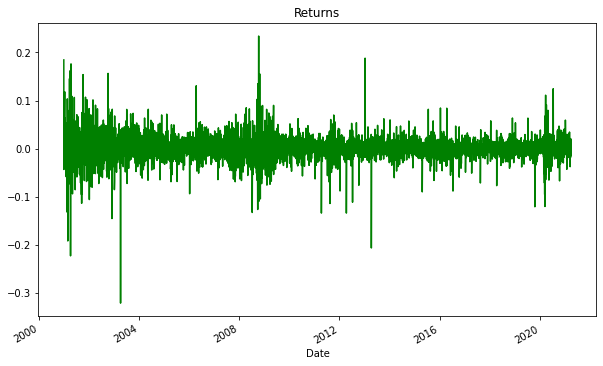

In [22]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

## News headlines data
### We'll perform same feature engineering tasks as above for news headlines data.

In [23]:
news_title=news_title.drop_duplicates()

In [24]:
news_title.shape

(3399876, 3)

In [25]:
news_title.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [26]:
news_title.head(5)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [27]:
# coverting the datatype of column 'publish_date' from type integer to type 'datetime'
news_title['publish_date'] = pd.to_datetime(news_title['publish_date'], format='%Y%m%d').dt.normalize()
news_title.head(3)

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?


In [28]:
news_title.tail()

,publish_date,headline_category,headline_text
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...
3424066,2020-12-31,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [29]:
news_title.dtypes

publish_date         datetime64[ns]
headline_category            object
headline_text                object
dtype: object

In [30]:
news_title.set_index('publish_date',inplace=True)

In [31]:
news_title.head()

,headline_category,headline_text
publish_date,,
2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2001-01-02,unknown,America's unwanted heading for India?
2001-01-02,unknown,For bigwigs; it is destination Goa
2001-01-02,unknown,Extra buses to clear tourist traffic


In [32]:
# TO DETECT WHETHER headlin_category COLUMNS CONTAINS ONLY unknown VALUES (RETURNS TRUE) ELSE RETURNS FALSE 
(news_title['headline_category'] == 'unknown').all()

False

In [33]:
news_title.tail()

,headline_category,headline_text
publish_date,,
2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
2020-12-31,removed,Govt extends deadline for use of FASTag till F...
2020-12-31,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [34]:
news_title.shape

(3399876, 2)

In [35]:
news_title.sort_index(ascending=True,axis=0)

,headline_category,headline_text
publish_date,,
2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2001-01-02,unknown,America's unwanted heading for India?
2001-01-02,unknown,For bigwigs; it is destination Goa
2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...
2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...


In [36]:
news_title.dtypes

headline_category    object
headline_text        object
dtype: object

In [37]:
news_title.drop('headline_category',axis=1,inplace=True)

## COMBINED STOCK DATA

### Both the two dataFrames indexes needs to be merged as they are not the same.

In [38]:
df1 = df1.reset_index()

In [39]:
news_title = news_title.reset_index()

In [40]:
stock=pd.concat([df1,news_title],axis=1)

In [41]:
stock.head(10)

,Date,Close,Open,High,Low,Volume,publish_date,headline_text
0,2001-01-02,2.730469,2.878906,2.914063,2.710938,4483200.0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,3.234375,2.705078,3.406250,2.691406,5856000.0,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-04,3.093750,3.193359,3.238281,3.031250,3811200.0,2001-01-02,America's unwanted heading for India?
3,2001-01-05,2.960938,3.148438,3.171875,2.937500,7414400.0,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-08,2.901855,2.953125,2.957031,2.767578,4326400.0,2001-01-02,Extra buses to clear tourist traffic
5,2001-01-09,3.031250,3.000000,3.089844,2.845703,2934400.0,2001-01-02,Dilute the power of transfers; says Riberio
6,2001-01-10,2.960938,2.937500,3.050781,2.871094,4118400.0,2001-01-02,Focus shifts to teaching of Hindi
7,2001-01-11,3.064453,2.992188,3.218750,2.890625,3251200.0,2001-01-02,IT will become compulsory in schools
8,2001-01-12,3.156250,3.156250,3.167969,3.031250,2668800.0,2001-01-02,Move to stop freedom fighters' pension flayed
9,2001-01-16,3.529297,3.185547,3.593750,3.155273,5491200.0,2001-01-02,Gilani claims he applied for passport 2 years ago


In [42]:
stock.dropna(axis=0, inplace=True)

In [43]:
stock.drop('publish_date',axis=1,inplace=True)

In [44]:
stock.set_index('Date',inplace=True)

In [45]:
stock.shape

(5094, 6)

In [46]:
stock.head(3)

,Close,Open,High,Low,Volume,headline_text
Date,,,,,,
2001-01-02,2.730469,2.878906,2.914063,2.710938,4483200.0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,3.234375,2.705078,3.406250,2.691406,5856000.0,Fissures in Hurriyat over Pak visit
2001-01-04,3.093750,3.193359,3.238281,3.031250,3811200.0,America's unwanted heading for India?


#        TEXTUAL ANALYSIS
## CALCULATING SENTIMENT SCORES

In [47]:
stock['negative']=''
stock['positive']=''
stock['neutral']=''
stock['compound']=''
stock.head(3)

,Close,Open,High,Low,Volume,headline_text,negative,positive,neutral,compound
Date,,,,,,,,,,
2001-01-02,2.730469,2.878906,2.914063,2.710938,4483200.0,Status quo will not be disturbed at Ayodhya; s...,,,,
2001-01-03,3.234375,2.705078,3.406250,2.691406,5856000.0,Fissures in Hurriyat over Pak visit,,,,
2001-01-04,3.093750,3.193359,3.238281,3.031250,3811200.0,America's unwanted heading for India?,,,,


In [48]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
stock['compound'] = stock['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock['negative'] = stock['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock['neutral'] = stock['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
stock['positive'] = stock['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
stock.head()

,Close,Open,High,Low,Volume,headline_text,negative,positive,neutral,compound
Date,,,,,,,,,,
2001-01-02,2.730469,2.878906,2.914063,2.710938,4483200.0,Status quo will not be disturbed at Ayodhya; s...,0.000,0.195,0.805,0.2924
2001-01-03,3.234375,2.705078,3.406250,2.691406,5856000.0,Fissures in Hurriyat over Pak visit,0.000,0.000,1.000,0.0000
2001-01-04,3.093750,3.193359,3.238281,3.031250,3811200.0,America's unwanted heading for India?,0.322,0.000,0.678,-0.2263
2001-01-05,2.960938,3.148438,3.171875,2.937500,7414400.0,For bigwigs; it is destination Goa,0.000,0.000,1.000,0.0000
2001-01-08,2.901855,2.953125,2.957031,2.767578,4326400.0,Extra buses to clear tourist traffic,0.000,0.342,0.658,0.3818


In [49]:
stock.drop(['headline_text'],inplace=True,axis=1)

In [50]:
stock.head(2)

,Close,Open,High,Low,Volume,negative,positive,neutral,compound
Date,,,,,,,,,
2001-01-02,2.730469,2.878906,2.914063,2.710938,4483200.0,0.0,0.195,0.805,0.2924
2001-01-03,3.234375,2.705078,3.406250,2.691406,5856000.0,0.0,0.000,1.000,0.0000


In [51]:
stock = stock[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

In [52]:
stock.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2001-01-02,2.730469,0.2924,0.000,0.805,0.195,2.878906,2.914063,2.710938,4483200.0
2001-01-03,3.234375,0.0000,0.000,1.000,0.000,2.705078,3.406250,2.691406,5856000.0
2001-01-04,3.093750,-0.2263,0.322,0.678,0.000,3.193359,3.238281,3.031250,3811200.0
2001-01-05,2.960938,0.0000,0.000,1.000,0.000,3.148438,3.171875,2.937500,7414400.0
2001-01-08,2.901855,0.3818,0.000,0.658,0.342,2.953125,2.957031,2.767578,4326400.0


In [53]:
## Writing prepared stock_data to disk 
stock.to_csv('stock_data.csv')

#        NUMERICAL ANALYSIS
## Reading stock data

In [54]:
stocks=pd.read_csv('stock_data.csv',index_col=False)

In [55]:
stocks.rename(columns={'Unnamed: 0':'Date'},inplace=True)
stocks.set_index('Date',inplace=True)
stocks.head(3)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2001-01-02,2.730469,0.2924,0.000,0.805,0.195,2.878906,2.914063,2.710938,4483200.0
2001-01-03,3.234375,0.0000,0.000,1.000,0.000,2.705078,3.406250,2.691406,5856000.0
2001-01-04,3.093750,-0.2263,0.322,0.678,0.000,3.193359,3.238281,3.031250,3811200.0


In [56]:
stocks.describe()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5.094000e+03
mean,6.424466,-0.010279,0.097172,0.803925,0.098903,6.423301,6.491481,6.354288,1.225933e+07
std,3.132031,0.301417,0.186783,0.242796,0.190604,3.131143,3.145358,3.115879,9.389762e+06
min,1.031875,-0.921700,0.000000,0.000000,0.000000,1.015938,1.070938,0.956250,3.360000e+05
25%,4.370312,0.000000,0.000000,0.619000,0.000000,4.374531,4.425312,4.313125,6.629950e+06
50%,6.549375,0.000000,0.000000,1.000000,0.000000,6.536875,6.597500,6.476250,1.004820e+07
75%,8.220000,0.000000,0.000000,1.000000,0.000000,8.220000,8.299062,8.150000,1.525480e+07
max,19.330000,0.855500,1.000000,1.000000,1.000000,19.219999,19.370001,19.160000,1.475912e+08


In [57]:
stocks.corr()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Close,1.000000,-0.025452,0.025437,-0.008522,-0.014068,0.999569,0.999800,0.999802,0.021037
compound,-0.025452,1.000000,-0.753391,0.046703,0.678783,-0.025419,-0.025749,-0.025210,-0.006691
negative,0.025437,-0.753391,1.000000,-0.634041,-0.172289,0.025352,0.025753,0.025194,0.010477
neutral,-0.008522,0.046703,-0.634041,1.000000,-0.652497,-0.008406,-0.008730,-0.008571,-0.010673
positive,-0.014068,0.678783,-0.172289,-0.652497,1.000000,-0.014133,-0.014113,-0.013768,0.003341
Open,0.999569,-0.025419,0.025352,-0.008406,-0.014133,1.000000,0.999784,0.999781,0.021369
High,0.999800,-0.025749,0.025753,-0.008730,-0.014113,0.999784,1.000000,0.999713,0.026577
Low,0.999802,-0.025210,0.025194,-0.008571,-0.013768,0.999781,0.999713,1.000000,0.015846
Volume,0.021037,-0.006691,0.010477,-0.010673,0.003341,0.021369,0.026577,0.015846,1.000000


In [58]:
## Feautre Engineering of Stock Data
stocks.shape

(5094, 9)

In [59]:
stocks.isna().sum()

Close       0
compound    0
negative    0
neutral     0
positive    0
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [60]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094 entries, 2001-01-02 to 2021-04-01
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     5094 non-null   float64
 1   compound  5094 non-null   float64
 2   negative  5094 non-null   float64
 3   neutral   5094 non-null   float64
 4   positive  5094 non-null   float64
 5   Open      5094 non-null   float64
 6   High      5094 non-null   float64
 7   Low       5094 non-null   float64
 8   Volume    5094 non-null   float64
dtypes: float64(9)
memory usage: 398.0+ KB


## EDA (Exploratory Data Analysis) of Stock Data

<AxesSubplot:>

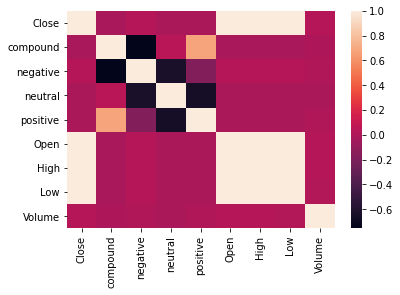

In [61]:
# Getting correlation between independent variables
import seaborn as sns
sns.heatmap(stocks.corr())

Text(0, 0.5, 'Close Price ($)')

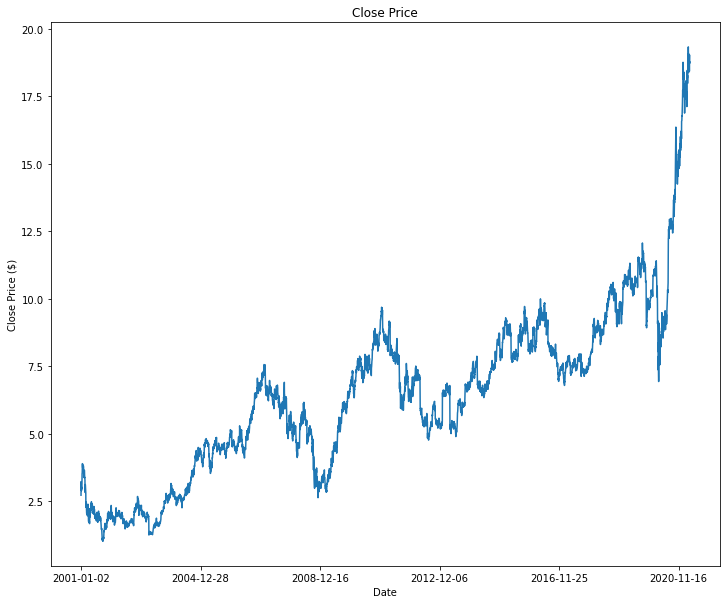

In [62]:
## PLOTTING FIGURE SIZE

import matplotlib.pyplot as plt
# plotting close price
plt.figure(figsize=(12,10))
stocks['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [63]:
## Calculating 7 day or Weekly rolling mean 
stocks.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,2.987654,0.063986,0.046000,0.877286,0.076714,2.973772,3.118304,2.836496,4.706286e+06
2001-01-11,3.035366,0.022214,0.046000,0.905143,0.048857,2.989955,3.161830,2.862165,4.530286e+06
2001-01-12,3.024205,0.082429,0.087857,0.811571,0.100571,3.054409,3.127790,2.910714,4.074971e+06


<AxesSubplot:xlabel='Date'>

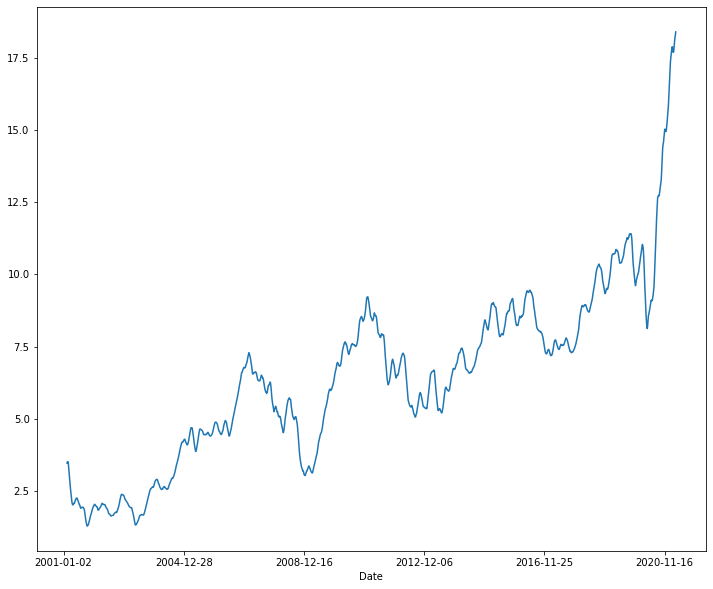

In [64]:
## Calculating 30 days monthly rolling mean of close price 
plt.figure(figsize=(12,10))
stocks.rolling(30).mean()['Close'].plot()

In [65]:
stocks

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2001-01-02,2.730469,0.2924,0.000,0.805,0.195,2.878906,2.914063,2.710938,4483200.0
2001-01-03,3.234375,0.0000,0.000,1.000,0.000,2.705078,3.406250,2.691406,5856000.0
2001-01-04,3.093750,-0.2263,0.322,0.678,0.000,3.193359,3.238281,3.031250,3811200.0
2001-01-05,2.960938,0.0000,0.000,1.000,0.000,3.148438,3.171875,2.937500,7414400.0
2001-01-08,2.901855,0.3818,0.000,0.658,0.342,2.953125,2.957031,2.767578,4326400.0
...,...,...,...,...,...,...,...,...,...
2021-03-26,18.719999,0.0000,0.000,1.000,0.000,18.530001,18.719999,18.299999,13425300.0
2021-03-29,18.430000,0.0000,0.000,1.000,0.000,18.700001,18.740000,18.360001,8066300.0
2021-03-30,18.799999,0.0000,0.000,1.000,0.000,18.790001,18.910000,18.750000,7845100.0


## Model Preparation

In [66]:
# calculating data_to_use
percentage_of_data = 1.0 #It means 100% dataset
data_to_use = int(percentage_of_data*(len(stocks)-1))

# using 80% of data for training
train = int(data_to_use*0.8)
total_data = len(stocks)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train)
print("Number of records in Test Data:", total_data - train)

Number of records in Training Data: 4074
Number of records in Test Data: 1020


In [67]:
# predicting one step ahead
steps_to_predict = 1

# capturing data to be used for each column
close_price = stocks.iloc[start:total_data,0] #close
compound = stocks.iloc[start:total_data,1] #compound
negative = stocks.iloc[start:total_data,2] #neg
neutral = stocks.iloc[start:total_data,3] #neu
positive = stocks.iloc[start:total_data,4] #pos
open_price = stocks.iloc[start:total_data,5] #open
high = stocks.iloc[start:total_data,6] #high
low = stocks.iloc[start:total_data,7] #low
volume = stocks.iloc[start:total_data,8] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


Date
2001-01-03     3.234375
2001-01-04     3.093750
2001-01-05     2.960938
2001-01-08     2.901855
2001-01-09     3.031250
                ...    
2021-03-26    18.719999
2021-03-29    18.430000
2021-03-30    18.799999
2021-03-31    18.719999
2021-04-01    19.010000
Name: Close, Length: 5093, dtype: float64

In [68]:
close_price_shifted = close_price.shift(-1) 

# shifting next day compound
compound_shifted = compound.shift(-1) 

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()    
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,,
2001-01-03,3.234375,3.093750,0.0000,-0.2263,5856000.0,2.705078,3.406250,2.691406
2001-01-04,3.093750,2.960938,-0.2263,0.0000,3811200.0,3.193359,3.238281,3.031250
2001-01-05,2.960938,2.901855,0.0000,0.3818,7414400.0,3.148438,3.171875,2.937500
2001-01-08,2.901855,3.031250,0.3818,0.0000,4326400.0,2.953125,2.957031,2.767578
2001-01-09,3.031250,2.960938,0.0000,0.0000,2934400.0,3.000000,3.089844,2.845703
2001-01-10,2.960938,3.064453,0.0000,0.0000,4118400.0,2.937500,3.050781,2.871094
2001-01-11,3.064453,3.156250,0.0000,0.4215,3251200.0,2.992188,3.218750,2.890625
2001-01-12,3.156250,3.529297,0.4215,0.0000,2668800.0,3.156250,3.167969,3.031250
2001-01-16,3.529297,3.533203,0.0000,-0.3400,5491200.0,3.185547,3.593750,3.155273


## Setting Target Variable

In [69]:
# setting the target variable as the shifted close_price
y = data['close_price_shifted']
y

Date
2001-01-03     3.093750
2001-01-04     2.960938
2001-01-05     2.901855
2001-01-08     3.031250
2001-01-09     2.960938
                ...    
2021-03-25    18.719999
2021-03-26    18.430000
2021-03-29    18.799999
2021-03-30    18.719999
2021-03-31    19.010000
Name: close_price_shifted, Length: 5092, dtype: float64

In [70]:
# setting the features dataset for prediction  
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
Date,,,,,,,
2001-01-03,3.234375,0.0000,-0.2263,5856000.0,2.705078,3.406250,2.691406
2001-01-04,3.093750,-0.2263,0.0000,3811200.0,3.193359,3.238281,3.031250
2001-01-05,2.960938,0.0000,0.3818,7414400.0,3.148438,3.171875,2.937500
2001-01-08,2.901855,0.3818,0.0000,4326400.0,2.953125,2.957031,2.767578
2001-01-09,3.031250,0.0000,0.0000,2934400.0,3.000000,3.089844,2.845703
...,...,...,...,...,...,...,...
2021-03-25,18.459999,-0.4019,0.0000,6647900.0,18.469999,18.559999,18.250000
2021-03-26,18.719999,0.0000,0.0000,13425300.0,18.530001,18.719999,18.299999
2021-03-29,18.430000,0.0000,0.0000,8066300.0,18.700001,18.740000,18.360001


## Feature Scaling

In [71]:
from sklearn import preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler
# scaling the feature dataset
scaler_x = MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.75926495,  0.03724961, -0.21742066, ..., -0.81442163,
         -0.74476158, -0.8093628 ],
        [-0.77463538, -0.21742066,  0.03724961, ..., -0.76077635,
         -0.76311978, -0.77202499],
        [-0.78915184,  0.03724961,  0.46691425, ..., -0.76571162,
         -0.77037764, -0.78232507],
        ...,
        [ 0.90162927,  0.03724961,  0.03724961, ...,  0.94287011,
          0.93114391,  0.91210613],
        [ 0.94207046,  0.03724961,  0.4895341 , ...,  0.95275801,
          0.94972409,  0.95495434],
        [ 0.93332639,  0.4895341 ,  0.06628404, ...,  0.94836328,
          0.94098048,  0.94506626]]),
 array([[-0.77463538],
        [-0.78915184],
        [-0.79560966],
        ...,
        [ 0.94207046],
        [ 0.93332639],
        [ 0.96502374]]))

### Dividing dataset into training and test set
##### Normally for any other dataset train_test_split from sklearn package is used, but for time series data like stock prices which is dependent on date, the dataset is divided into train and test dataset in a different way as shown below. In timeseries data, an observation for a particular date is always dependent on the previous date records.

In [72]:
x_train = x[0 : train,]
x_test = x[train+1 : len(x),]    
y_train = y[0 : train] 
y_test = y[train+1 : len(y)]  

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', x_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in the Test set X:', x_test.shape, 'and y:', y_test.shape)
# from sklearn.model_selection import train_test_split, KFold
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
# x_train.shape

Number of rows and columns in the Training set X: (4074, 7) and y: (4074, 1)
Number of rows and columns in the Test set X: (1017, 7) and y: (1017, 1)


In [73]:
x_test.shape

(1017, 7)

In [74]:
y_train.shape

(4074, 1)

### Data Modeling

In [75]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost
import lightgbm

### I have used 11 Machine Learning Algorithms for prediction

-Random Forest, 
-Decision Tree, 
-XGBoost, 
-Adaboost, 
-lgbm Boost, 
-Support Vector Machines (SVM), 
-LinearRegression, 
-Ridge, 
-Lasso, 
-ElasticNet, 
-KNRegressor

In [76]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)
print(prediction[:10])
print(y_test[:10])
print("Mean Squared Error is :",mean_squared_error(y_test,prediction))

<ipython-input-76-8108fc91bbd7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


[-0.27079824 -0.26189842 -0.26311029 -0.25241657 -0.25143833 -0.24224613
 -0.26180005 -0.26599447 -0.2541203  -0.24660997]
[[-0.26515695]
 [-0.26406394]
 [-0.25750589]
 [-0.25422687]
 [-0.25641288]
 [-0.25204085]
 [-0.25368036]
 [-0.24930833]
 [-0.24930833]
 [-0.24930833]]
Mean Squared Error is : 0.0884622003433182


In [77]:
import warnings
warnings.filterwarnings('ignore')
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)
print(predictions)
print()
print("Mean Squared Error is: ",mean_squared_error(y_test,predictions))
# r2_score=r2_score(y_test,predictions)
# print("R2 Score: ",r2_score)

[-0.24109642 -0.25314731 -0.24109642 ... -0.08898127 -0.08898127
 -0.09942155]

Mean Squared Error is:  0.09908637037684614


In [78]:
from sklearn.tree import DecisionTreeRegressor
dec_tree=DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)
predictions = dec_tree.predict(x_test)
print(predictions)
print()
print("Mean squared error is : ",mean_squared_error(y_test,predictions))
# r2_score=r2_score(y_test,predictions)
# print("R2 Score: ",r2_score)

[-0.25791577 -0.25572975 -0.26297093 ... -0.05857841 -0.05857841
 -0.05857841]

Mean squared error is :  0.08800145537908412


In [79]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)
predictions=lgb.predict(x_test)
print(predictions)
print()
print("Mean squared error is :",mean_squared_error(y_test,predictions))

[-0.26907948 -0.26557333 -0.26234795 ... -0.06561352 -0.06646478
 -0.06634043]

Mean squared error is : 0.09130362311156373


In [80]:
xgb=xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
predictions=xgb.predict(x_test)
print(predictions)
print()
print("Mean squared error is :",mean_squared_error(y_test,predictions))

[-0.27249292 -0.26665238 -0.26937017 ... -0.05021961 -0.05077519
 -0.0444319 ]

Mean squared error is : 0.08675985012257675


In [81]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=0) #sensitivity of the SVM to additional training instances is set by the epsilon (ϵ) parameter,
                    #i.e the higher the parameter, the more of an impact additional training instances has on the model results.
svm_reg.fit(x_train, y_train)
predictions=svm_reg.predict(x_test)
print(predictions)
print()
print("Mean squared error is :",mean_squared_error(y_test,predictions))

[-0.27236235 -0.26400673 -0.26129583 ...  0.90559782  0.94674486
  0.93751197]

Mean squared error is : 0.00047006571693905406


In [82]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
lreg=LinearRegression()
lreg.fit(x_train,y_train)
predictions=lreg.predict(x_test)
print(predictions)
print()
print("Mean squared error is:  ",mean_squared_error(predictions,y_test))

[[-0.27489921]
 [-0.26568785]
 [-0.2632476 ]
 ...
 [ 0.89990031]
 [ 0.94210112]
 [ 0.93251333]]

Mean squared error is:   0.0004742639839146637


In [83]:
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
mean_squared_error_ridge = np.mean((y_test-y_pred)**2)
print("Mean squared error is : ",mean_squared_error_ridge)

Mean squared error is :  0.0004994096634713008


In [84]:
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)
  
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set:  ", mean_squared_error)

Mean squared error on test set:   0.3954691581561476


In [85]:
e_net = ElasticNet(alpha = 1)
e_net.fit(x_train, y_train)
  
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print(y_pred_elastic)
print("Mean Squared Error on test set:  ", mean_squared_error)

[-0.52022992 -0.52022992 -0.52022992 ... -0.52022992 -0.52022992
 -0.52022992]
Mean Squared Error on test set:   0.3954691581561476


In [86]:
from sklearn.neighbors import KNeighborsRegressor 
import math
n_neighbors=5
knn=KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(x_train,y_train)
predictions=knn.predict(x_train)
print(predictions)

[[-0.79652285]
 [-0.79793694]
 [-0.79308715]
 ...
 [-0.25411757]
 [-0.2552379 ]
 [-0.27010281]]


### Now, before comparing differrent models using cross validation techniques, let's first find best cross_val_technique out of :- KFold, TSCV, Blocked Tscv. 

In [88]:
import tscv
from sklearn.multioutput import MultiOutputRegressor
from sklearn. model_selection import cross_val_score, KFold
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

## KFOLD Technique
def build_model(_alpha, _l1_ratio):
    estimator = ElasticNet(
        alpha=_alpha,
        l1_ratio=_l1_ratio,
        fit_intercept=True,
        normalize=False,
        precompute=False,
        max_iter=16,
        copy_X=True,
        tol=0.1,
        warm_start=False,
        positive=False,
        random_state=None,
        selection='random'
    )

    return MultiOutputRegressor(estimator, n_jobs=4)

model = build_model(_alpha=1.0, _l1_ratio=0.3)
kfcv = KFold(n_splits=5)
scores = cross_val_score(model, x_train, y_train, cv=kfcv, scoring='r2')
print("KFold Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))
print()

# TSCV technique
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(model, x_train, y_train, cv=tscv, scoring='r2')
print("Time Series Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))
print()

KFold Loss: -17.555 (+/- 26.973)

Time Series Loss: -8.021 (+/- 6.931)



In [89]:
## Blocked TSCV
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

model = build_model(_alpha=1.0, _l1_ratio=0.3)
btscv = BlockingTimeSeriesSplit(n_splits=5)
scores = cross_val_score(model, x_train, y_train, cv=btscv, scoring='r2')
print("Blocked Time Series Loss: {0:.3f} (+/- {1:.3f})".format(scores.mean(), scores.std()))

Blocked Time Series Loss: -19.504 (+/- 21.434)


### Getting suitable parameters

In [90]:
params = {
    'estimator__alpha':(0.1, 0.3, 0.5, 0.7, 0.9),
    'estimator__l1_ratio':(0.1, 0.3, 0.5, 0.7, 0.9)
}

for i in range(20):
    model = build_model(_alpha=1.0, _l1_ratio=0.3)

    finder = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='r2',
        n_jobs=None,
        refit=False,
        cv=tscv,  # change this to the splitter subject to test
        verbose=1,
        pre_dispatch=8,
        error_score=-999,
        return_train_score=True
    )

    finder.fit(x_train, y_train)

    best_params = finder.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 

In [91]:
print(best_params)

{'estimator__alpha': 0.1, 'estimator__l1_ratio': 0.1}


In [92]:
# optimal model
model = build_model(_alpha=0.1, _l1_ratio=0.1)
# train model
model.fit(x_train, y_train)
# test score
y_predicted = model.predict(x_test)
print(y_predicted)

[[-0.35994115]
 [-0.36200471]
 [-0.35781642]
 ...
 [ 0.37300692]
 [ 0.39045935]
 [ 0.3855177 ]]


## Comparing Different ML Models

In [93]:
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import random
models=[]
models.append(('LR', LinearRegression()))
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('ELN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', LinearSVR()))
models.append(('LGBoost', LGBMRegressor()))
models.append(('RForest', RandomForestRegressor()))
models.append(('ABoost', AdaBoostRegressor()))
models.append(('DTree', DecisionTreeRegressor()))
models.append(('XGboost', XGBRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train,  cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.982887 (0.009360)
RIDGE: 0.980704 (0.011546)
LASSO: -17.555167 (26.973013)
ELN: -17.555167 (26.973013)
KNN: 0.461474 (0.966222)
SVM: 0.982724 (0.009270)
LGBoost: 0.630674 (0.704857)
RForest: 0.741205 (0.482868)
ABoost: 0.040877 (1.835597)
DTree: 0.697830 (0.540066)
XGboost: 0.723627 (0.513695)


### Out of all algorithms above, Random Forest Regression algorithm has fairly desired outcomes. So let's use RandomForestRegressor for further predictions

In [95]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
#We now have a fit model, pass in our test data to the fitted model to make predictions with it.
predictions = model.predict(x_test)

In [96]:
# unscaling the predictions
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions), 1)))

# printing the predictions
print('Predictions:')
predictions[0:5]

Predictions:


array([[7.691225],
       [7.79685 ],
       [7.79685 ],
       [7.8548  ],
       [7.892625]])

In [97]:
# calculating root mean squared error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test - predictions),2)))
print('Root Mean Square Error =', round(root_mean_square_error,4))

Root Mean Square Error = 9.0678


In [98]:
x_test = scaler_x.inverse_transform(np.array(x_test).reshape((len(x_test), len(cols))))

# unscaling the test y dataset, y_test
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1)))
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))
x_test,y_train,y_test

(array([[ 7.67    ,  0.      ,  0.      , ...,  7.9     ,  7.915   ,
          7.625   ],
        [ 7.755   ,  0.      ,  0.      , ...,  7.75    ,  7.805   ,
          7.675   ],
        [ 7.765   ,  0.      , -0.1531  , ...,  7.83    ,  7.885   ,
          7.75    ],
        ...,
        [18.43    ,  0.      ,  0.      , ..., 18.700001, 18.74    ,
         18.360001],
        [18.799999,  0.      ,  0.4019  , ..., 18.790001, 18.91    ,
         18.75    ],
        [18.719999,  0.4019  ,  0.0258  , ..., 18.75    , 18.83    ,
         18.66    ]]),
 array([[3.09375 ],
        [2.960938],
        [2.901855],
        ...,
        [7.78    ],
        [7.705   ],
        [7.885   ]]),
 array([[ 7.755   ],
        [ 7.765   ],
        [ 7.825   ],
        ...,
        [18.799999],
        [18.719999],
        [19.01    ]]))

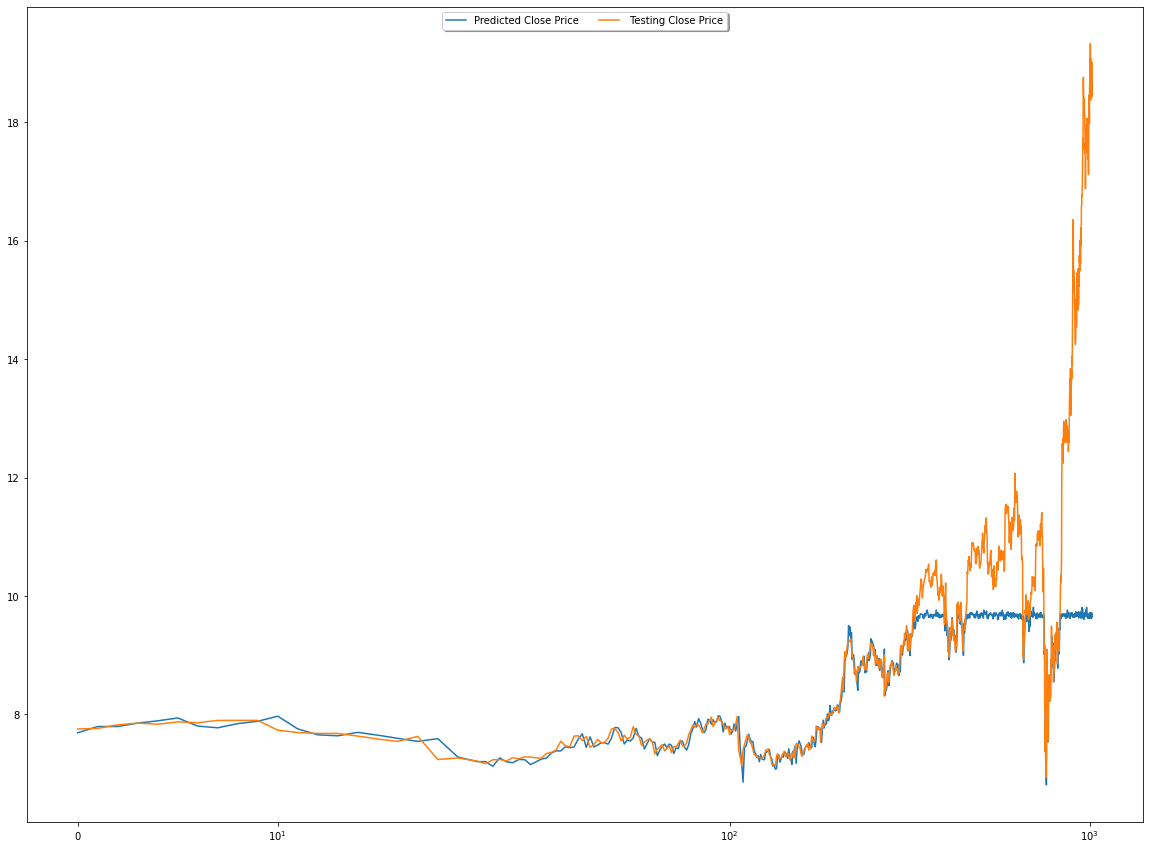

In [100]:
# plotting
fig=plt.figure(figsize=(20,15))
# plt.plot([row[0] for row in y_train], label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label=" Testing Close Price")
plt.xscale('symlog',linthreshx=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), fancybox=True, shadow=True, ncol=4)
plt.show()